In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [104]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
else:
    print('Unknown system... sorry~~~~')

Windows version


In [105]:
train = pd.read_csv("C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/ssuda 스터디/1. 영화 관객수/movies_train.csv")
test = pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/ssuda 스터디/1. 영화 관객수/movies_test.csv')
submission = pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/ssuda 스터디/1. 영화 관객수/submission.csv')

# EDA  
title : 영화의 제목  
distributor : 배급사  
genre : 장르  
release_time : 개봉일  
time : 상영시간(분)  
screening_rat : 상영등급  
director : 감독이름  
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)  
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)  
num_staff : 스탭수  
num_actor : 주연배우수  
box_off_num : 관객수  

In [106]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [107]:
test.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor'],
      dtype='object')

In [108]:
train['box_off_num']

0        23398
1      7072501
2      6959083
3       217866
4       483387
        ...   
595    1475091
596    1716438
597       2475
598    2192525
599    7166532
Name: box_off_num, Length: 600, dtype: int64

In [109]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

In [110]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


<AxesSubplot:xlabel='num_staff', ylabel='box_off_num'>

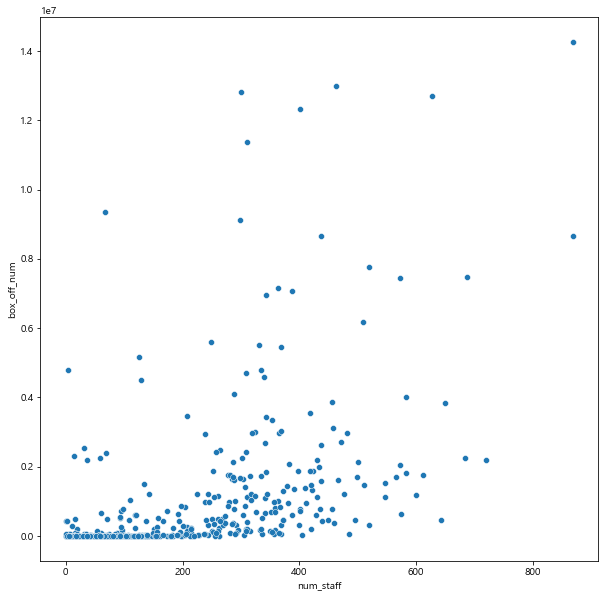

In [111]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='num_staff', y = 'box_off_num')

<AxesSubplot:xlabel='time', ylabel='box_off_num'>

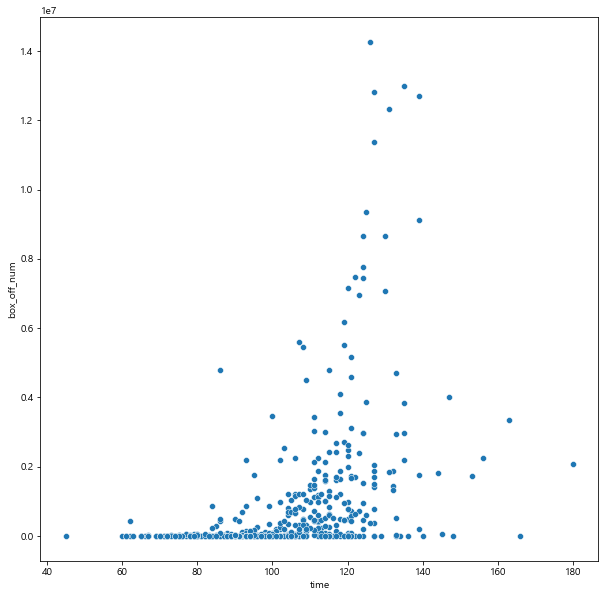

In [112]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='time', y = 'box_off_num')

<AxesSubplot:xlabel='genre', ylabel='box_off_num'>

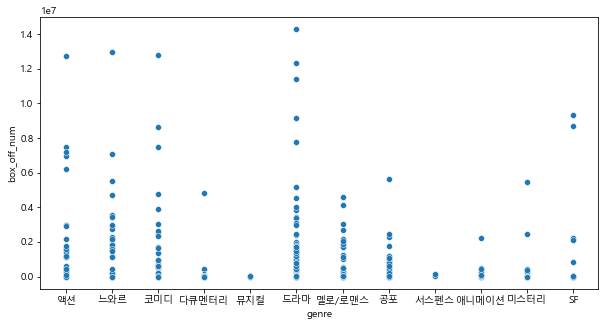

In [113]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=train, x='genre', y = 'box_off_num')

<AxesSubplot:xlabel='num_actor', ylabel='box_off_num'>

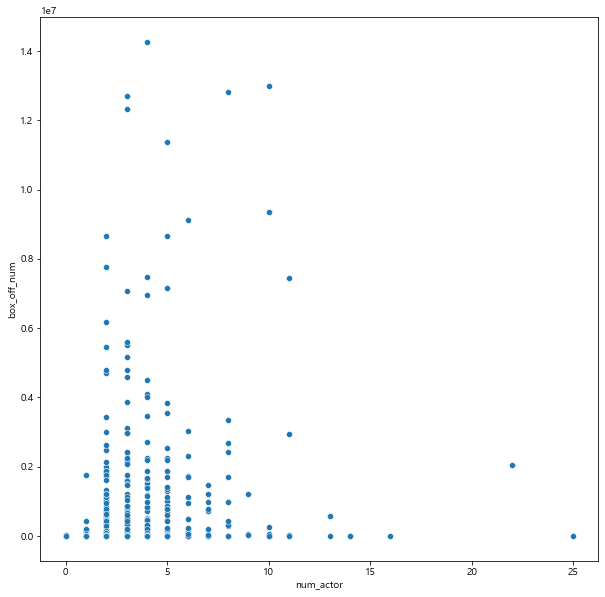

In [114]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='num_actor', y = 'box_off_num')

In [115]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


<AxesSubplot:>

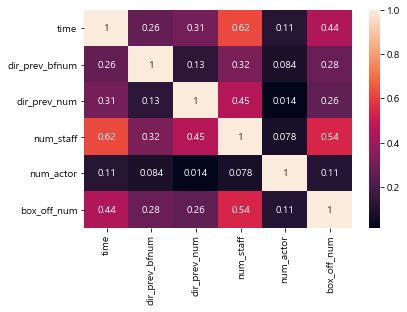

In [116]:
sns.heatmap(train.corr(), annot = True)

In [117]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [118]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [119]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [120]:
train['dir_prev_bfnum'].fillna(0,inplace=True)
test['dir_prev_bfnum'].fillna(0,inplace=True)

In [121]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [122]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [123]:
tr_nm_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'num_rank').sort_values(by = 'num_rank')
tr_nm_rank

,distributor,num_rank
141,인피니티엔터테인먼트,2.0
65,고구마공작소,8.0
92,사람과 사람들,42.0
131,위드시네마,46.0
68,나우콘텐츠,54.0
...,...,...
50,CJ E&M 영화부문,2242510.0
121,영구아트무비,2541603.0
96,쇼박스(주)미디어플렉스,2634823.0
27,(주)아이필름코퍼레이션,3117859.0


In [124]:
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,distributor,num_rank
141,인피니티엔터테인먼트,1
65,고구마공작소,2
92,사람과 사람들,3
131,위드시네마,4
68,나우콘텐츠,5
...,...,...
50,CJ E&M 영화부문,165
121,영구아트무비,166
96,쇼박스(주)미디어플렉스,167
27,(주)아이필름코퍼레이션,168


In [125]:
train = pd.merge(train, tr_nm_rank, how = 'left')
test = pd.merge(test, tr_nm_rank, how = 'left')

In [126]:
test.fillna(0, inplace = True)

In [127]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [128]:
X = train[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
y = np.log1p(train.box_off_num)

In [129]:
X

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat
0,151,96,91,2,11,청소년 관람불가
1,164,130,387,3,12,청소년 관람불가
2,164,123,343,4,11,15세 관람가
3,158,101,20,6,9,전체 관람가
4,167,108,251,2,9,15세 관람가
...,...,...,...,...,...,...
595,158,111,510,7,8,청소년 관람불가
596,164,127,286,6,8,15세 관람가
597,49,99,123,4,7,청소년 관람불가
598,159,102,431,4,12,15세 관람가


In [130]:
X = pd.get_dummies(columns = ['screening_rat'], data = X)

In [131]:
X

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,151,96,91,2,11,0,0,0,1
1,164,130,387,3,12,0,0,0,1
2,164,123,343,4,11,0,1,0,0
3,158,101,20,6,9,0,0,1,0
4,167,108,251,2,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...
595,158,111,510,7,8,0,0,0,1
596,164,127,286,6,8,0,1,0,0
597,49,99,123,4,7,0,0,0,1
598,159,102,431,4,12,0,1,0,0


In [132]:
X['num_actor'] = np.log1p(X['num_actor'])

In [133]:
target = test[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]

In [134]:
target = pd.get_dummies(columns = ['screening_rat'], data = target)

In [135]:
target['num_actor'] = np.log1p(target['num_actor'])

K-Fold

In [136]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

GradientBoostingRegressor

In [137]:
gbm = GradientBoostingRegressor(random_state = 42)

In [138]:
rmse_list = []
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 10)

In [139]:
np.mean(rmse_list)

1118763.1860099484

In [140]:
lgbm = LGBMRegressor(random_state = 518)

In [141]:
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

In [142]:
np.mean(rmse_list)

1203660.01681787

In [143]:
xgb = XGBRegressor(random_state = 518)

In [144]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

In [145]:
np.mean(rmse_list)

1231583.6148945158

In [146]:
cat = CatBoostRegressor(random_state = 518, silent = True)

In [147]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in cat.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

In [148]:
np.mean(rmse_list)

1117961.732395471

In [149]:
rf = RandomForestRegressor(random_state = 518)

In [150]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)

In [151]:
np.mean(rmse_list)

881899.9185985869

In [152]:
submission['box_off_num'] = (xgb_pred + cat_pred + lgb_pred + rf_pred + gb_pred) / 5

In [153]:
submission.sort_values(by = 'box_off_num')

,title,box_off_num
130,댄서김의 은밀한 교수법,1.197146e+01
39,REC 알이씨,1.428051e+01
139,화려한 외출,2.041772e+01
238,해에게서 소년에게,2.051508e+01
173,옹녀뎐,2.312697e+01
...,...,...
229,베테랑,3.552072e+06
135,용의자,4.040154e+06
142,박수건달,4.702861e+06
179,군도: 민란의 시대,5.248096e+06
